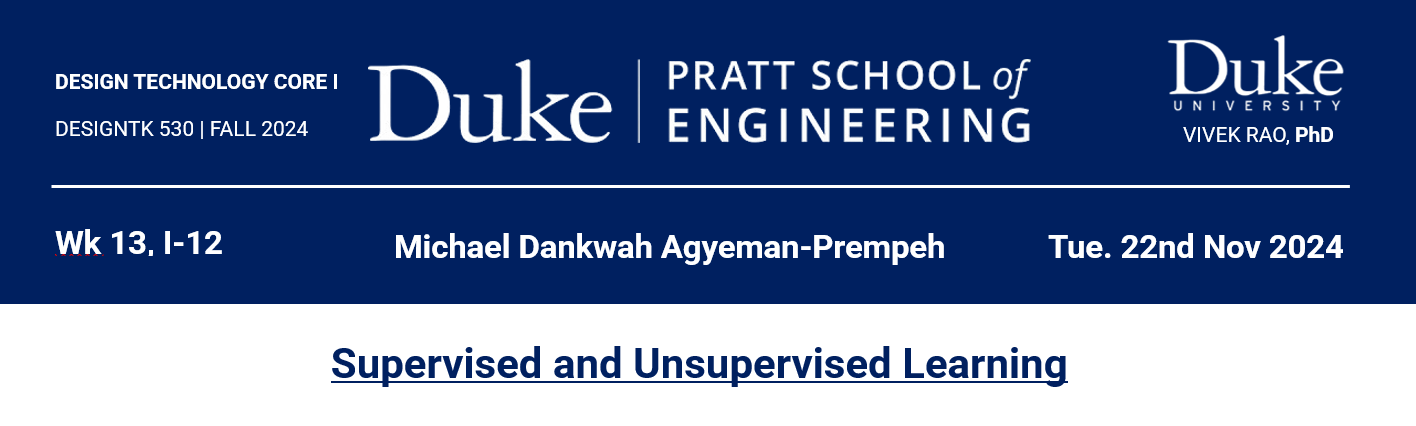

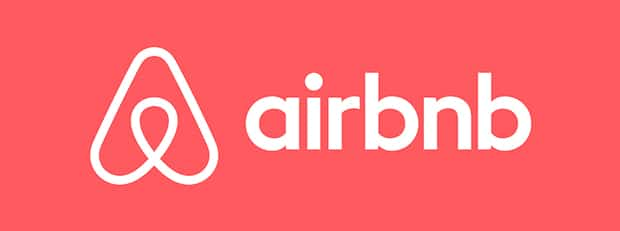

In this assignment, I will be utilizing the **AirBnB Dataset** which has been used in the past in-class activities of DESIGNTK530

### **I. Pip Installing Packages Specifically for This Assignment**

In [82]:
!pip install ucimlrepo


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### **II. Importing Essential Libraries for Data Manipulation, Analysis and Visualization**

In [83]:
import pandas as pd
import numpy as np
import scipy as sp
import datetime as dt
from scipy import stats
from operator import attrgetter
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

# For Supervised & Unsupervised Learning

from ucimlrepo import fetch_ucirepo

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

### **III. Assessing of AirBnB Data**

In [84]:
# Sourcing the 'AirBnB Dataset' to explore and perform some analysis

orig_airbnb_data = pd.read_csv('C:/Users/micha/Desktop/Assign 12/dtk530_i-12/i-12/i-12_datasets/airbnb.csv')

# No of rows
orig_airbnb_data_rows = orig_airbnb_data.shape[0]
# No of columns
orig_airbnb_data_columns = orig_airbnb_data.shape[1]
# Get the values
print(orig_airbnb_data_rows,'\n',orig_airbnb_data_columns)

orig_airbnb_data.info()
# the_airbnb_data.describe()

# Showing first 30 rows of table
orig_airbnb_data.head(10)

10019 
 17
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10019 entries, 0 to 10018
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          10019 non-null  int64  
 1   listing_id          10019 non-null  int64  
 2   name                10014 non-null  object 
 3   host_id             10019 non-null  int64  
 4   host_name           10017 non-null  object 
 5   neighbourhood_full  10019 non-null  object 
 6   coordinates         10019 non-null  object 
 7   room_type           10019 non-null  object 
 8   price               9781 non-null   object 
 9   number_of_reviews   10019 non-null  int64  
 10  last_review         7944 non-null   object 
 11  reviews_per_month   7944 non-null   float64
 12  availability_365    10019 non-null  int64  
 13  rating              7944 non-null   float64
 14  number_of_stays     7944 non-null   float64
 15  5_stars             7944 non-null   float6

,Unnamed: 0,listing_id,name,host_id,host_name,neighbourhood_full,coordinates,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added
0,0,13740704,"Cozy,budget friendly, cable inc, private entra...",20583125,Michel,"Brooklyn, Flatlands","(40.63222, -73.93398)",Private room,45$,10,12/12/2018,0.70,85,4.100954,12.0,0.609432,6/8/2018
1,1,22005115,Two floor apartment near Central Park,82746113,Cecilia,"Manhattan, Upper West Side","(40.78761, -73.96862)",Entire home/apt,135$,1,6/30/2019,1.00,145,3.367600,1.2,0.746135,12/25/2018
2,2,21667615,Beautiful 1BR in Brooklyn Heights,78251,Leslie,"Brooklyn, Brooklyn Heights","(40.7007, -73.99517)",Entire home/apt,150$,0,NaN,NaN,65,NaN,NaN,NaN,8/15/2018
3,3,6425850,"Spacious, charming studio",32715865,Yelena,"Manhattan, Upper West Side","(40.79169, -73.97498)",Entire home/apt,86$,5,9/23/2017,0.13,0,4.763203,6.0,0.769947,3/20/2017
4,4,22986519,Bedroom on the lively Lower East Side,154262349,Brooke,"Manhattan, Lower East Side","(40.71884, -73.98354)",Private room,160$,23,6/12/2019,2.29,102,3.822591,27.6,0.649383,10/23/2020
5,5,271954,Beautiful brownstone apartment,1423798,Aj,"Manhattan, Greenwich Village","(40.73388, -73.99452)",Entire home/apt,150$,203,6/20/2019,2.22,300,4.478396,243.6,0.743500,12/15/2018
6,6,33473567,Hamilton Heights Full Floor Garden Apt,33388853,Christine,"Manhattan, Harlem","(40.8309, -73.94308000000002)",Entire home/apt,200$,0,NaN,NaN,219,NaN,NaN,NaN,5/5/2018
7,7,14218742,Luxury/3bedroom/3bthrm/Privateprkng/beach/rstrnts,78824908,Ilona,"Brooklyn, Sheepshead Bay","(40.58531, -73.93811)",Entire home/apt,224$,2,6/22/2018,0.08,353,4.091228,2.4,0.690393,12/17/2017
8,8,15125599,Beautiful One Bedroom Apartment Near Central Park,3191545,Kyle,"Manhattan, Theater District","(40.761, -73.98522)",Entire home/apt,169$,5,6/25/2017,0.15,365,3.562947,6.0,0.704538,12/20/2016
9,9,24553891,Enjoy all of Manhattan. Big Apple! A Mini-MOMA!,68557372,Shannon,"Manhattan, Harlem","(40.80667, -73.95182)",Entire home/apt,75$,8,4/24/2019,0.66,9,4.695769,9.6,0.750073,10/19/2018


### **IV. Cleaning of AirBnB Data**

*Cleaning Code sourced from EDA notebook prepared by Ritu from Class 3*


---


From analyzing the Airbnb dataset, the following data cleaning tasks are planned to ensure the data is ready for analysis:

- **[Task 1]** Remove the unnecessary index column named `Unnamed: 0`, which likely originates from exporting the data.
  
- **[Task 2]** Clean the `price` column by stripping dollar signs and commas, then converting the values to `float` for numerical computations.

- **[Task 3]** Fill missing values (`NaNs`) in critical columns:
  - Columns like `number_of_reviews`, `reviews_per_month`, `rating`, `number_of_stays`, and `5_stars` will be filled with `0`, assuming missing values imply no data.
  - Convert the `last_review` column to a datetime format while handling any invalid parsing results.

- **[Task 4]** Convert the `listing_added` column to datetime, enabling time-based operations. Invalid entries will be coerced into `NaT`.

- **[Task 5]** Drop rows where key columns (`name` or `price`) contain missing values to ensure data reliability.

- **[Task 6]** Standardize text fields like `name` and `host_name` by stripping leading and trailing whitespace to maintain consistency.

- **[Task 7]** Rename columns to enhance readability and ensure standardized naming conventions (e.g., `listing_id` → `Listing ID`, `price` → `Price ($)`).

- **[Task 8]** Remove duplicate rows from the dataset to eliminate redundant records.

---

#### **[Task 1]**

In [85]:
# Dropping the 'Unnamed: 0' column, which is likely an unnecessary index column added during data export

the_airbnb_data = orig_airbnb_data.drop(columns=['Unnamed: 0'])

#### **[Task 2]**

In [86]:
# Cleaning the 'price' column by removing dollar signs and commas to convert the column to float for numerical operations

the_airbnb_data['price'] = the_airbnb_data['price'].replace('[\$,]', '', regex=True).astype(float)

#### **[Task 3]**

In [87]:
# Filling missing values (NaNs) in various columns with default values
# - 'number_of_reviews', 'reviews_per_month', 'rating', 'number_of_stays', and '5_stars' are filled with 0, assuming no data means 0.
# - 'last_review' is converted to a datetime format, with errors ignored (i.e., invalid parsing results in NaT).

the_airbnb_data['number_of_reviews'] = the_airbnb_data['number_of_reviews'].fillna(0)
the_airbnb_data['reviews_per_month'] = the_airbnb_data['reviews_per_month'].fillna(0)
the_airbnb_data['rating'] = the_airbnb_data['rating'].fillna(0)
the_airbnb_data['number_of_stays'] = the_airbnb_data['number_of_stays'].fillna(0)
the_airbnb_data['5_stars'] = the_airbnb_data['5_stars'].fillna(0)
the_airbnb_data['last_review'] = pd.to_datetime(the_airbnb_data['last_review'], errors='coerce')

#### **[Task 4]**

In [88]:
# Converting the 'listing_added' column to a datetime format to handle date-based operations, with invalid entries coerced to NaT

the_airbnb_data['listing_added'] = pd.to_datetime(the_airbnb_data['listing_added'], errors='coerce')

#### **[Task 5]**

In [89]:
# Dropping rows where the 'name' or 'price' columns have missing values
# This ensures the dataset contains listings with both a valid name and price

the_airbnb_data = the_airbnb_data.dropna(subset=['name', 'price'])

#### **[Task 6]**

In [90]:
# Stripping leading and trailing whitespace from 'name' and 'host_name' columns
# This ensures consistency and avoids issues caused by unwanted spaces in string fields

the_airbnb_data['name'] = the_airbnb_data['name'].str.strip()
the_airbnb_data['host_name'] = the_airbnb_data['host_name'].str.strip()

#### **[Task 7]**

In [91]:
# Renaming columns to make them more readable and standardized
the_airbnb_data = the_airbnb_data.rename(columns={
    'listing_id': 'Listing ID',
    'name': 'Listing Name',
    'host_id': 'Host ID',
    'host_name': 'Host Name',
    'neighbourhood_full': 'Neighborhood',
    'coordinates': 'Coordinates',
    'room_type': 'Room Type',
    'price': 'Price ($)',
    'number_of_reviews': 'Number of Reviews',
    'last_review': 'Last Review',
    'reviews_per_month': 'Reviews per Month',
    'availability_365': 'Availability (days/year)',
    'rating': 'Rating',
    'number_of_stays': 'Number of Stays',
    '5_stars': '5-Star Rating',
    'listing_added': 'Listing Added'
})

#### **[Task 8]**

In [92]:
the_airbnb_data = the_airbnb_data.drop_duplicates()

Let's assess the cleaned data now!

In [93]:
# the_airbnb_data.describe()
the_airbnb_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9763 entries, 0 to 10018
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Listing ID                9763 non-null   int64         
 1   Listing Name              9763 non-null   object        
 2   Host ID                   9763 non-null   int64         
 3   Host Name                 9761 non-null   object        
 4   Neighborhood              9763 non-null   object        
 5   Coordinates               9763 non-null   object        
 6   Room Type                 9763 non-null   object        
 7   Price ($)                 9763 non-null   float64       
 8   Number of Reviews         9763 non-null   int64         
 9   Last Review               7740 non-null   datetime64[ns]
 10  Reviews per Month         9763 non-null   float64       
 11  Availability (days/year)  9763 non-null   int64         
 12  Rating                  

## **A. Supervised Learning**

### **Problem 1.1 - Model Development Using Linear Regression**

#### **<mark>Step A</mark> - Features Selection (*X variable*) and Justification for target - price element (*Y variable*)**

#### **i) The 3 Features:**
##### **1. Number of Reviews**
The **Number of Reviews** immediately stands out as a strong feature for my linear regression model. Intuitively, I'd expect that the more reviews a listing has, the higher the price tends to be. More reviews usually signals that a property is in higher demand and can command premium pricing. 

From a practical standpoint, reviews are also a nice numerical value, so they'll integrate seamlessly into my regression model without any complex data transformations.

##### **2. Rating**
Another key feature I'm really excited about is the **Rating**. A higher rating from guests is a direct signal of quality, and quality listings can justify higher prices. Ratings are measured on a 5-star scale, which translates well to a continuous numeric value that should correlate linearly with price.

Analyzing guest ratings gives me great insight into how the market perceives the value of the listing - this is a critical factor in determining the optimal price point.

##### **3. Availability (days/year)**
The final feature I've selected is **Availability (days/year)**. This metric gives me valuable insights into the supply and demand dynamics at play. Properties with lower availability are likely more exclusive and in-demand, so they can probably charge higher prices.

Similar to the other features, availability is represented as a nice numeric value that I can easily incorporate into my linear regression model. This availability data point rounds out my understanding of the key factors influencing Airbnb listing prices.

##### **4. Reviews per Month**

The Reviews per Month metric stands out as a valuable predictor for my linear regression model. A higher frequency of reviews typically indicates a property's consistent bookings and active rental status, suggesting higher market demand. Like our other features, this numerical value will fit naturally into our regression analysis without requiring complex preprocessing.

#### **ii) Features to Avoid:**
In contrast, I'm intentionally avoiding some other features that are either too complex or don't have a clear linear relationship with the target price variable. For example, the geographic **Coordinates** could get messy to work with, and the **Room Type** would need to be encoded from text into numbers, adding unnecessary complexity.

Additionally, attributes like **Listing ID** or **Listing Added** date don't provide direct insights into how the pricing should work - they're more administrative in nature.


---

#### **<mark>Step B</mark> - Correlation Matrix to Visualize Relationship between Features and Target Variable**

Before we even perform our linear regression, we need to first create a dataframe with the features selected and our target variable, `Price ($)`

In [94]:
# Renaming and tagging the selected features columns to make them understandable for our correlation matrix
# Number of Stay and Room Type's names should be fine
the_airbnb_data = the_airbnb_data.rename(columns={
    'Number of Reviews': 'X1 Property Popularity',
    'Rating': 'X2 Guest Rating',
    'Availability (days/year)': 'X3 Booking Frequency',
    'Reviews per Month': 'X4 Monthly Review Frequency',
    'Price ($)': 'Y Listing Price ($)'
})

In [95]:
# Creating the dataframe with the selected features (X1 - X4) and target variable (Y)
features = ['X1 Property Popularity', 'X2 Guest Rating', 'X3 Booking Frequency', 'X4 Monthly Review Frequency']
target = 'Y Listing Price ($)'
abnb_features_target = the_airbnb_data[features + [target]]

# Calculate the correlation matrix
correlation_matrix = abnb_features_target.corr()

# Display the correlation matrix
correlation_matrix

,X1 Property Popularity,X2 Guest Rating,X3 Booking Frequency,X4 Monthly Review Frequency,Y Listing Price ($)
X1 Property Popularity,1.000000,0.251968,0.167869,0.585893,-0.049548
X2 Guest Rating,0.251968,1.000000,0.022557,0.343724,-0.097440
X3 Booking Frequency,0.167869,0.022557,1.000000,0.161842,0.085718
X4 Monthly Review Frequency,0.585893,0.343724,0.161842,1.000000,-0.058699
Y Listing Price ($),-0.049548,-0.097440,0.085718,-0.058699,1.000000


Let's also check for null values in our new dataframe

In [96]:
# Checking for null values in each column of abnb_features_target dataframe
null_counts = abnb_features_target.isnull().sum()
null_counts

X1 Property Popularity         0
X2 Guest Rating                0
X3 Booking Frequency           0
X4 Monthly Review Frequency    0
Y Listing Price ($)            0
dtype: int64

Now, let's visualize the correlation matrix above

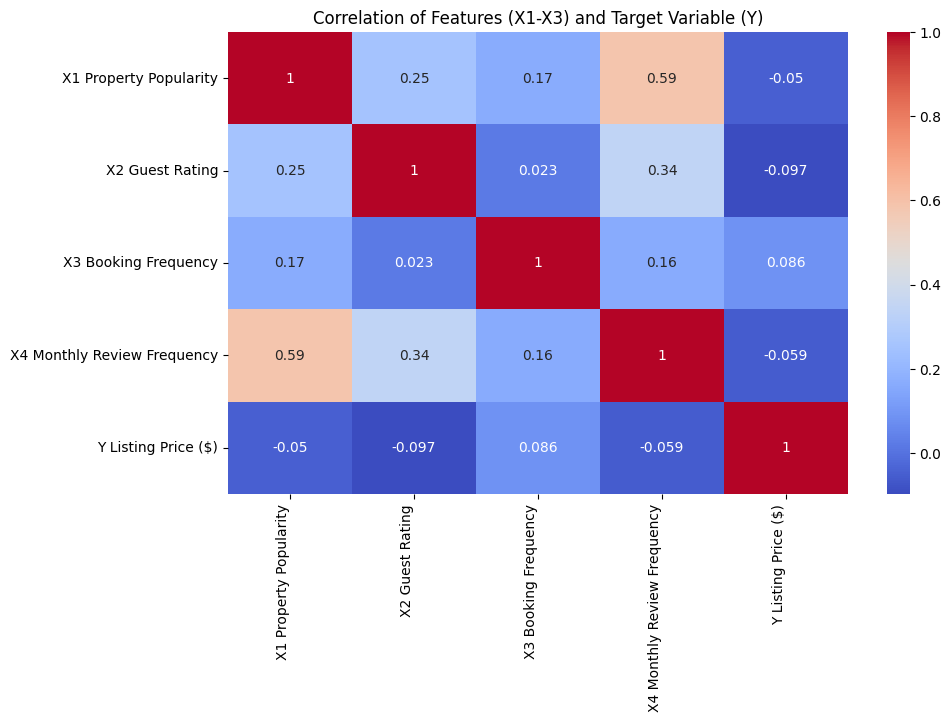

In [97]:
# Using seaborn to create a heat map to visualize the correlation of the features and the target variable - price
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.xticks(rotation=90, ha='right')
plt.yticks(rotation=0)
plt.title('Correlation of Features (X1-X3) and Target Variable (Y)')
plt.show()

#### **Addressing Removing Weakly Correlated Features & Multicollinearity:**
Since I had to justify the selection of my features (*from the <mark>Step A</mark> section*), there would be no need to comment more on these two items.

---

Let's proceed to apply our linear regression model on our extracted dataset.

#### **<mark>Step C</mark> - Applying the Linear Regression Model**

In [ ]:
# Splitting the data into training and testing set
X = abnb_features_target.drop('Y Listing Price ($)', axis=1)
Y = abnb_features_target['Y Listing Price ($)']

X_abnb_train, X_abnb_test, Y_abnb_train, Y_abnb_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Training the linear regression model
lr_model = LinearRegression()
lr_model.fit(X_abnb_train, Y_abnb_train)

# Making predictions
Y_abnb_pred = lr_model.predict(X_abnb_test)

#### **<mark>Step D</mark> - Mean Square Error & Residual Value Reporting**

In [ ]:
# Evaluating the model
MSE = mean_squared_error(Y_abnb_test, Y_abnb_pred)
R2 = r2_score(Y_abnb_test, Y_abnb_pred)

print(f'Mean Squared Error: {MSE}')
print(f'R2 Score: {R2}')

Mean Squared Error: 31843.313453908533
R2 Score: -0.14422846476507845


#### **<mark>Step E</mark> - Visualization of *Actual vs. Predicted Prices* of the AirBnB Dataset**

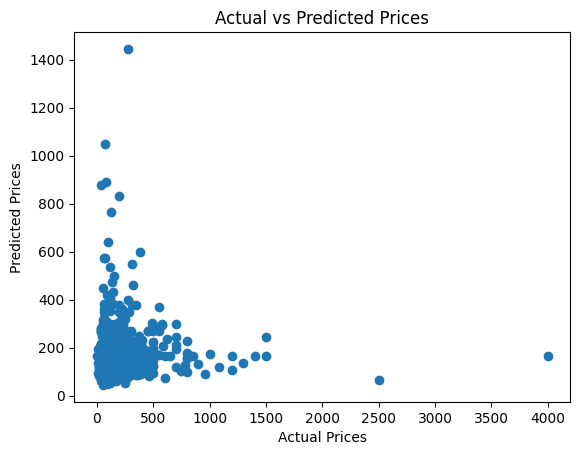

In [100]:
# Visualizing our predictive results
plt.scatter(Y_abnb_test, Y_abnb_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()

---

### **Problem 1.2 - Analysis & Discussion**

#### Model Effectiveness
The model appears to be analyzing Airbnb listing data, focusing on factors like property popularity, guest ratings, booking frequency, and monthly review frequency to predict listing prices. 

**Strengths:**
- The model incorporates multiple relevant variables that logically influence listing prices.
- It uses correlation analysis to understand relationships between variables, which is a solid starting point for predictive modeling.
- However, since the data itself lacks linearity, this supervised learning - linear regression wasn't effective
- I had a very high MSE and value of zero for my R2. Something we want to avoid.

**Conclusion and Limitations:**
- The correlation coefficients between the predictors (X1-X4) and the listing price (Y) are relatively weak, with the strongest being only 0.085718 for booking frequency.
- This suggests that the model might not be very effective in accurately predicting listing prices based solely on these variables.

#### Complementing Other Tools
This model serves as a good complement to other tools we've studied in class:

1. **EDA and Statistical Testing:** The correlation matrix provides a foundation for exploratory data analysis, helping identify potential relationships between variables.

2. **AB Testing:** While not directly applicable here, the insights from this model could inform hypotheses for AB tests on pricing strategies.

3. **Sentiment Analysis:** Incorporating sentiment from reviews could enhance the guest rating variable and potentially improve the model's predictive power.

4. **Cohort Analysis:** Segmenting listings into cohorts based on neighborhoods or property types might reveal stronger correlations within specific groups.


#### Room for Improvement
To enhance the model's effectiveness, we could:

1. Include more variables like location, amenities, and seasonal trends.
   
2. Apply non-linear modeling techniques to capture complex relationships.
   
3. Incorporate time-series analysis to account for price fluctuations over time.

In conclusion, while this model provides a starting point for understanding AirBnB pricing factors, its current predictive power seems limited. Integrating it with other 
analytical tools and expanding the feature set could lead to more robust insights and predictions.

---

### **B. Unsupervised Learning**

---

### **NB:**

In [101]:
# Any info to note can go here